In [41]:
import os
import glob
import pandas as pd
os.chdir("Late_April")

In [ ]:
cd C:\Users\Avinash Verma\Desktop\Data analysis\IBM\

In [42]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [43]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')


In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [46]:
# Reading data
df=pd.read_csv('combined_csv.csv')
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1250574628726214658,817072420947247104,2020-04-16T00:00:00Z,Tu_IMSS_Coah,"Para complementar la higiene de tus manos, el ...",TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,1671,169,NaN,2017-01-05T18:17:00Z,False,es
1,1250574627127975938,44728980,2020-04-16T00:00:00Z,ANCALERTS,PWDs from Tahanang Walang Hagdan get aid amid ...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,4915788,775,NaN,2009-06-04T21:26:24Z,True,tl
2,1250574628671467521,1235017593649418241,2020-04-16T00:00:00Z,julycio,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,43,266,NaN,2020-03-04T01:43:19Z,False,th
3,1250574628575010816,92174767,2020-04-16T00:00:00Z,DZMMTeleRadyo,Target ng Department of Health na magkaroon ng...,TweetDeck,NaN,NaN,NaN,False,...,3,NaN,NaN,NaN,1372231,161,NaN,2009-11-24T02:03:16Z,True,tl
4,1250574628201717760,1042498579909107712,2020-04-16T00:00:00Z,ContraReplicaMX,La @SSalud_mx lanzó una nueva convocatoria esp...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,13474,2557,NaN,2018-09-19T19:40:04Z,False,es


In [47]:
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [48]:
 #dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head()

,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-16T00:00:00Z,"Para complementar la higiene de tus manos, el ...",1828,2,NaN,es
1,2020-04-16T00:00:00Z,PWDs from Tahanang Walang Hagdan get aid amid ...,5449,1,NaN,tl
2,2020-04-16T00:00:00Z,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,27,0,NaN,th
3,2020-04-16T00:00:00Z,Target ng Department of Health na magkaroon ng...,578,3,NaN,tl
4,2020-04-16T00:00:00Z,La @SSalud_mx lanzó una nueva convocatoria esp...,5743,0,NaN,es


In [49]:
# filtering data with 'country_code = IN' and 'language = en'
tweet =tweet[(tweet.country_code == "IN") & (tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['country_code','lang'],axis=1,inplace=True)
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-16T00:22:06Z,Interesting Read. A Four point strategy beyond...,841,0
1,2020-04-16T00:31:50Z,@Imamofpeace China sneezed - world freezed.\n\...,664,0
2,2020-04-16T00:33:14Z,"The poor in India are starving, the public is ...",5134,1
3,2020-04-16T00:40:40Z,We are not stuck at home we are safe at home.....,230,0
4,2020-04-16T00:50:40Z,I wish to contribute a little amount to our lo...,5,0


In [50]:
# created_at column
tweet["created_at"] = tweet["created_at"].apply(lambda i:(int(i.split("T")[1].split(":")[0])+int(i.split("T")[1].split(":")[1])/60))

In [51]:
tweet.shape

(17669, 4)

In [52]:
# check missing values
tweet.isna().sum()

created_at          0
text                0
favourites_count    0
retweet_count       0
dtype: int64

In [53]:
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    interesting read a four point strategy beyond ...
1    china sneezed world freezed covid 19 chinesevi...
2    the poor in india are starving the public is t...
3    we are not stuck at home we are safe at home s...
4    i wish to contribute a little amount to our lo...
Name: text, dtype: object

In [54]:
#Top 5 most favourited tweets:
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] good morning my dear friends my distinguished friend amp champion of environment amp cleanair has made an amazing video for our responsibility in this coronavirus lockdown period request everyone to watch it and share their thoughts 

1 ] missed this bihu due to covid19 

2 ] news most of your vote bank got coronavirus 

3 ] for the sake of the country please spell out the strategy as there is no vaccine or medicine for covid 19 

4 ] i do not want any credit i just want the people of the country to be free from covid 19 whether the government believes it or not we will continue to play the role of positive opposition and keep giving our suggestions ji rahulspeaksforindia 



In [55]:
retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', retweet['text'][i],'\n')

0 ] this lady is working in a icu deptt in hospital where covid patients are treated she came home after 20 days of non stop service her family amp society people welcomed her covid 19 

1 ] ancient spiritual value system is upheld by saints philosophers and monks of the country brutality towards them is an attack on the indian culture and civilization palgharmoblynching palghar incident stayhomestaysafe stayathome digital pryer 

2 ] only the bjp can do both communalism and corruption during covid 19 genius party 

3 ] noble cause by tableeghijamaat of 1068 covid19 positive tablighis in delhi hospitals around 300 have recovered and all of them have agreed to donate blood plasma to the same people they are accused of infecting coronaupdatesindia covid 19india plasmatheropy ramazan 

4 ] food for 2 lakh families in need proud of our distribution partners who have committed to supporting 2l families during covid19 this is above our 15 cr pledge we don t need to be rich to help we need to

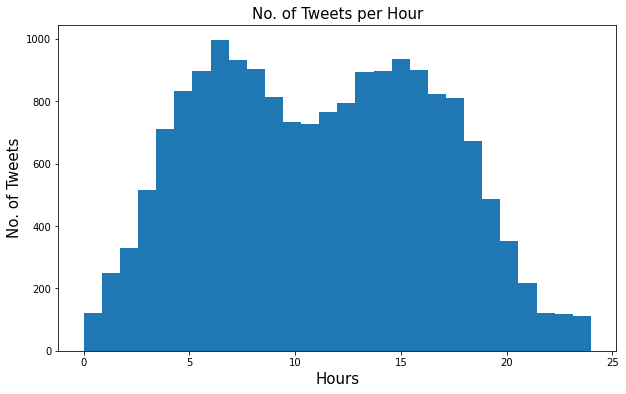

In [80]:
plt.figure(1, figsize=(10,6))
plt.hist(tweet["created_at"],bins = 28);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)
plt.savefig('Histo.png')

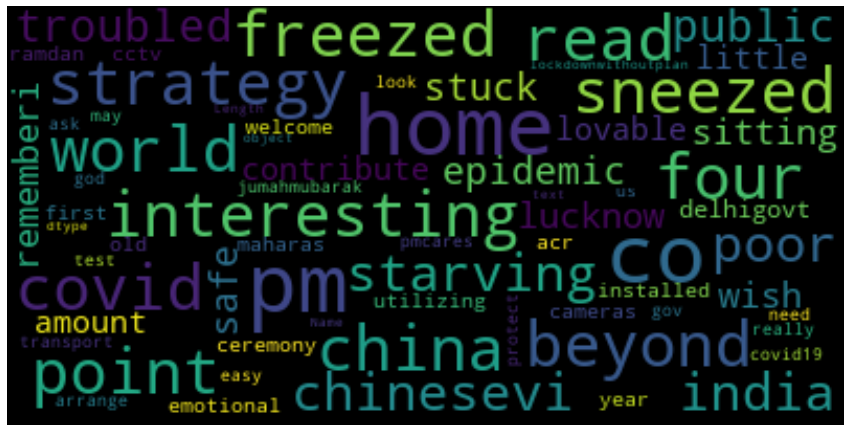

NameError: name 'cloud' is not defined

In [83]:
#Word Cloud :
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])
cloud.to_file('WordCloud1.png')

In [58]:
#Removing Stopwords
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [59]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    interesting read four point strategy beyond co...
1    china sneezed world freezed covid 19 chinesevi...
2    poor india starving public troubled epidemic c...
3    stuck home safe home sitting lucknow rememberi...
4    wish contribute little amount lovable pm s pm ...
Name: text, dtype: object

In [60]:
#Analyzing text using TextBlob to predict the sentiment of the text and categorise it as:
# 'Positive', 'Negative' or 'Neutral'.
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.366667,interesting read four point strategy beyond co...,841,0,positive,0.333333
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0
2,0.550000,poor india starving public troubled epidemic c...,5134,1,negative,-0.3
3,0.666667,stuck home safe home sitting lucknow rememberi...,230,0,positive,0.675
4,0.833333,wish contribute little amount lovable pm s pm ...,5,0,positive,0.304167


positive    8689
neutral     6265
negative    2715
Name: sentiment, dtype: int64


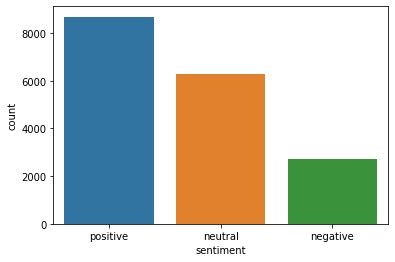

In [75]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);
plt.savefig("Count_for_Sentiments.png")

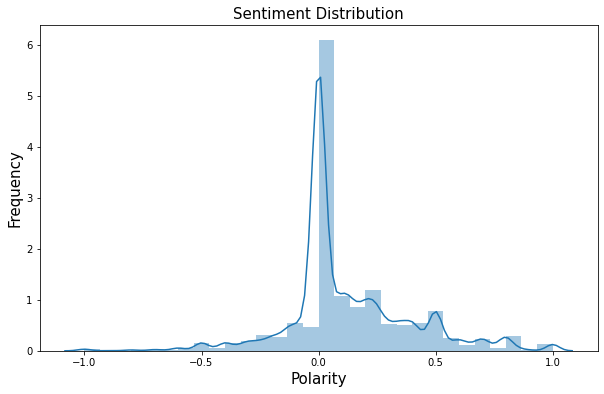

In [62]:
#Sentiment Distribution
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

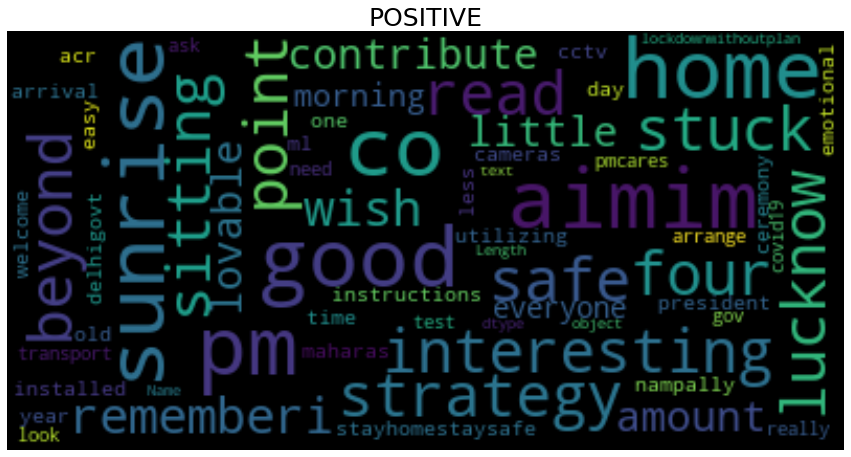

<Figure size 432x288 with 0 Axes>

In [76]:
#Using Word Clouds to see the higher fequency words from each sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')
plt.savefig('WordCloud_for_postive_sentiments.png')

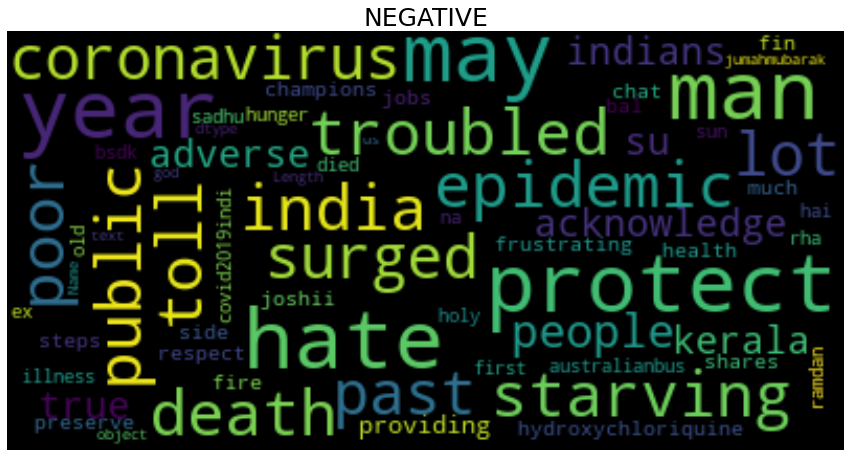

<Figure size 432x288 with 0 Axes>

In [77]:
neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')
plt.savefig('WordCloud_for_Negative_sentiments.png')

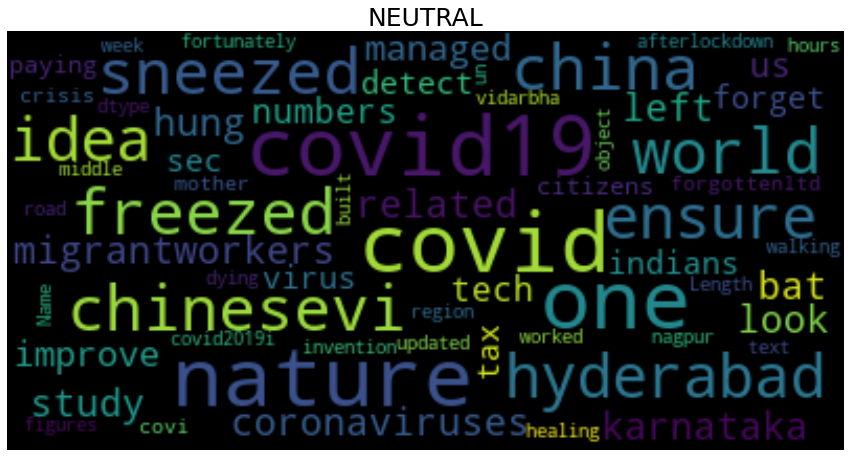

<Figure size 432x288 with 0 Axes>

In [78]:
neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')
plt.savefig('WordCloud_for_Neutral_sentiments.png')

In [64]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,20566325
neutral,51059498
positive,67140366


In [65]:
#Most frequently appearing words
words = []
words = [word for i in tweet.text for word in i.split()]


In [66]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,covid19,6997
1,covid,6979
2,19,6075
3,coronavirus,4899
4,stayhomestaysafe,3358


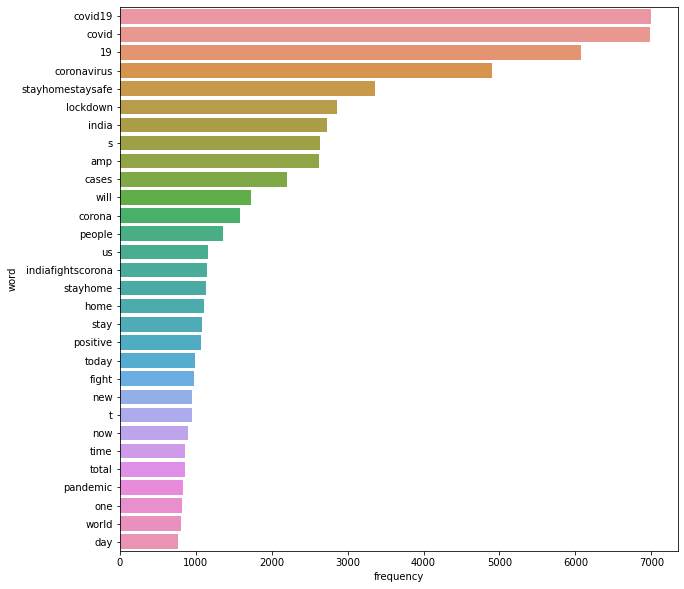

In [79]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);
plt.savefig('BarPlot_MostFreqentlyAppeared.png')


In [68]:
# tweet.to_csv('tweet.csv',index=False)


In [73]:
#Conclusion
#We can conclude that mostly people have a positive and neutral sentiment towards the start of Lockdown-2.